# DALI tracking to Positron source 
# first order, with SC effect

## Najmeh Mirian

21 Jan 2025

Here we have the lattices of Positron source and transfer line to FIR laser.

In [1]:
import IPython
import numpy
import time
import scipy
import matplotlib
import ocelot
print('ocelot:', ocelot.__version__)
from __future__ import print_function
%matplotlib inline
from ocelot import *
#from Ocelot graphical modules
from ocelot.gui.accelerator import *
from copy import deepcopy
from DALI_lattice import *

initializing ocelot...
ocelot: 24.03.0
0.7853981633974483 0.23561944901923448 0.19634954084936207
0.2617993877991494


In [2]:
#Change RF parameters
phi=-3
LA1RC1.phi=phi; LA1RC2.phi=phi; LA2RC1.phi=phi; LA2RC1.phi=phi
Q1L.k1=-3

In [3]:
method = {"global": SecondTM}
# method = {"global": TransferMap}
lat_DALI_PS = MagneticLattice(Gun2PS,method=method) 

In [4]:
sc1 = SpaceCharge()
sc1.nmesh_xyz = [63, 63, 63]
sc1.step = 1

sc5 = SpaceCharge()
sc5.nmesh_xyz = [63, 63, 63]
sc5.step = 5

sc3 = SpaceCharge()
sc5.nmesh_xyz = [63, 63, 63]
sc5.step = 3

In [5]:
print(lat_DALI_PS.sequence[0])

Marker(eid="START.1.I")


In [6]:
p_array_init = load_particle_array("injection_gun_beamm.npz")

In [7]:
navi = Navigator(lat_DALI_PS)

# add physics processes from the first element to the last of the lattice
navi.add_physics_proc(sc3, lat_DALI_PS.sequence[0], lat_DALI_PS.sequence[-1])
#navi.add_physics_proc(sc5, C_A1_1_2_I1, lat.sequence[-1])

# definiing of unit step in [m]
navi.unit_step = 0.1


p_array = deepcopy(p_array_init)
start = time.time()
tws_track, p_array = track(lat_DALI_PS, p_array, navi)
print("\n time exec:", time.time() - start, "sec")

z = 20.665238898038467 / 20.665238898038467. Applied: paceChargeee
 time exec: 14.445183992385864 sec


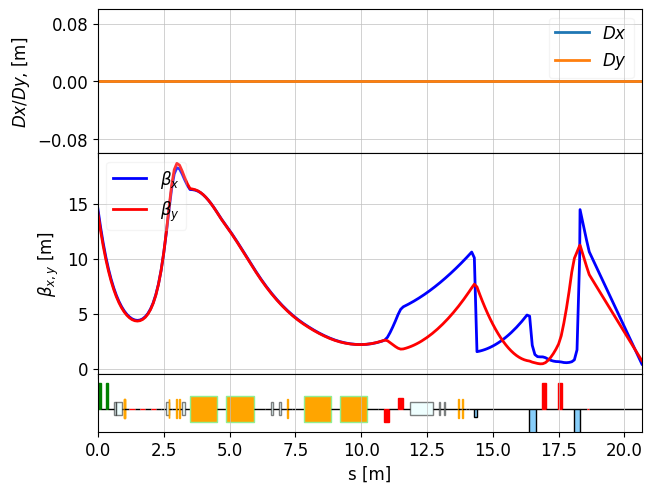

In [8]:
plot_opt_func(lat_DALI_PS, tws_track, top_plot=["Dx", "Dy"],fig_name=0, legend=False)
plt.show()

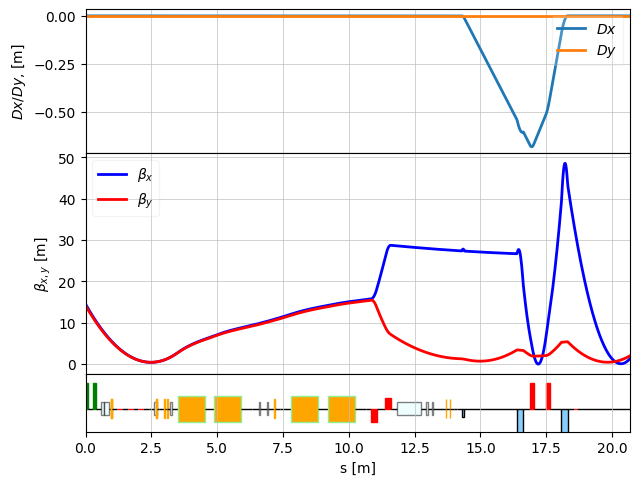

In [9]:
tws_Tranport_to_PS = twiss(lat_DALI_PS,tws_track[0] ,nPoints=1000)

# plot optical functions.
plot_opt_func(lat_DALI_PS, tws_Tranport_to_PS, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()

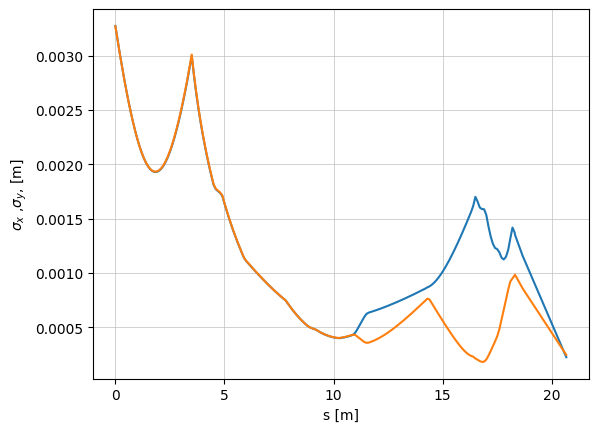

In [10]:
sigma_x = np.sqrt([tw.xx for tw in tws_track])
sigma_y = np.sqrt([tw.yy for tw in tws_track])
s = [tw.s for tw in tws_track]

plt.plot(s, sigma_x)
plt.plot(s, sigma_y)
plt.xlabel("s [m]")
plt.ylabel(r"$\sigma_x$ ,$\sigma_y$, [m]")
plt.show()


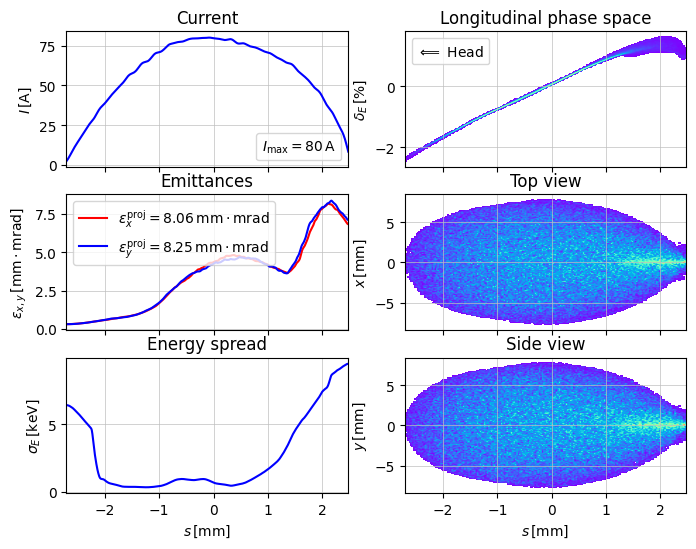

In [11]:
show_e_beam(p_array_init, figsize=(8,6))
plt.show()

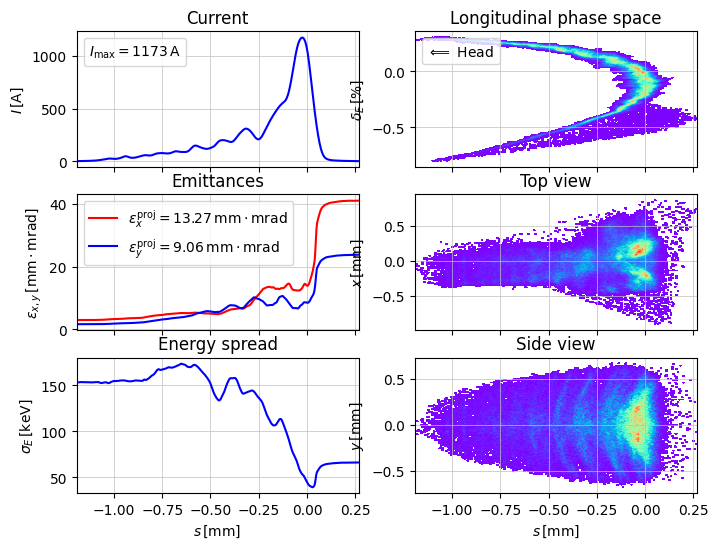

In [12]:
show_e_beam(p_array, figsize=(8,6))
plt.show()

In [13]:
g=53/0.51
print(np.sqrt(10.665369301003443*7.68675711451365e-08*g))
print(7.68675711451365e-08*g)

0.009230226855209746
7.988198569984774e-06


In [14]:
print(tws_track[-1])

emit_x  = 1.2664201684460983e-07
emit_y  = 8.650103647668349e-08
beta_x  = 0.40619530509617674
beta_y  = 0.7116877658780401
alpha_x = 0.06198917547247859
alpha_y = 0.3585530826142958
gamma_x = 2.4713300357769357
gamma_y = 1.5857520209861415
Dx      = 0.0
Dy      = 0.0
Dxp     = 0.0
Dyp     = 0.0
mux     = 0.0
muy     = 0.0
nu_x    = 0.0
nu_y    = 0.0
E       = 0.053544
s        = 20.665238898038467



In [15]:
len(tws_track)

188

In [16]:
print(tws_Tranport_to_PS[-1])

emit_x  = 7.365138174912308e-07
emit_y  = 7.534879456221737e-07
beta_x  = 1.2189912837680268
beta_y  = 1.9616613790203754
alpha_x = -3.4476920130730164
alpha_y = -1.7985308743549218
gamma_x = 10.571511370593011
gamma_y = 2.158738175353502
Dx      = 1.6928803120424633e-07
Dy      = 0.0
Dxp     = 1.1372745100855554e-07
Dyp     = 0.0
mux     = 9.526483604338779
muy     = 9.433389060491866
nu_x    = 1.5161869559144123
nu_y    = 1.501370499086291
E       = 0.05354400083545158
s        = 20.665238898038467



In [17]:
print(p_array_init)

ParticleArray: 
Ref. energy : 0.0056 GeV 
Ave. energy : 0.0056 GeV 
std(x)      : 3.272 mm
std(px)     : 1.296 mrad
std(y)      : 3.27 mm
std(py)     : 1.295 mrad
std(p)      : 0.0096
std(tau)    : 1.228 mm
Charge      : 1.0 nC 
s pos       : 0.0 m 
n particles : 100000



In [18]:
print(tws_track[0])

emit_x  = 7.365138174912308e-07
emit_y  = 7.534879456221737e-07
beta_x  = 14.536983646893802
beta_y  = 14.193144329608034
alpha_x = 5.668202451983896
alpha_y = 5.532646004350875
gamma_x = 2.278912864000848
gamma_y = 2.2271436882043365
Dx      = 0.0
Dy      = 0.0
Dxp     = 0.0
Dyp     = 0.0
mux     = 0.0
muy     = 0.0
nu_x    = 0.0
nu_y    = 0.0
E       = 0.0055933376
s        = 0.0

